In [1]:
%%capture
##############################################################################
# IGNORE if you are running on a local machine and have all the dependencies #
##############################################################################

# installing dependencies --- to be able to run on google colab
# it would take 2-3 minutes

!yes | pip3 uninstall pandas
!yes | pip3 uninstall geopandas

!apt-get install libspatialindex-c4v5;
!pip3 install Rtree;
!pip3 install osmnx;
!pip3 install tqdm;
!pip3 install ipyleaflet;
!pip3 install pandas
!pip3 install geopandas==0.7.0
!pip3 install matplotlib==3.1.0
!pip3 install osmapi
!pip3 install geopy
!pip3 install plotly
!pip3 install folium

In [2]:
import osmnx as ox
from ipyleaflet import *
import networkx as nx
import plotly.graph_objects as obj
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import osmapi as osm
import time
from collections import deque
from tqdm import tqdm
from itertools import islice

In [3]:
!unzip /content/utilities.zip 

Archive:  /content/utilities.zip
ec68c57f03f6058b04cfe8c1108e65923c57b776
   creating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/
   creating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/.github/
   creating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/.github/ISSUE_TEMPLATE/
  inflating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/.github/ISSUE_TEMPLATE/bug_report.md  
  inflating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/.gitignore  
  inflating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/LICENSE  
  inflating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/README.md  
  inflating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/__init__.py  
   creating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/src/
  inflating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/src/__init__.py  
  inflating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b776/src/common.py  
  inflating: utilities-ec68c57f03f6058b04cfe8c1108e65923c57b7

In [5]:
from utilities import *

# New Section

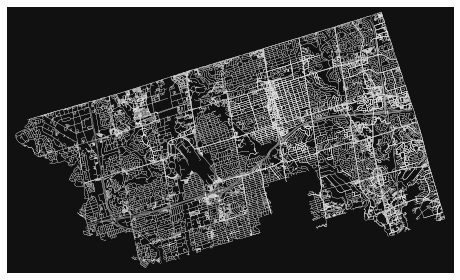

In [6]:
place = 'North York, Ontario, Canada'
G = ox.graph_from_place(place)
fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2)  # display the city of North York 

In [27]:
nodes, edges = ox.graph_to_gdfs(G)      # Convert node and edge GeoDataFrames to a MultiDiGraph.
# print("Nodes:\n", nodes.head(), '\n')   
# print("Edges:\n", edges.head(), '\n')
# print("Type:", type(edges)) 

# print("Nodes:", nodes);
# print("Edges:", edges);
df = pd.DataFrame(edges)  # data frame 
dic = df.to_dict()

print(len(dic['u']), len(dic['v']))
print(dic['u'][0])
print(dic['v'][0])
print(dic['maxspeed'][0])
print(dic['highway'][0])
print(dic['geometry'][0])
print(dic['oneway'][0])

api = osm.OsmApi()
id_info = api.NodeGet(dic['v'][0])
point = (id_info['lat'], id_info['lon']) # lat (y), lon (x) 
print(point)

# all_nodes = list(nodes.to_dict()['osmid'].keys()) 
# index_element = all_nodes.index(dic['u'][0])
# print(index_element)
# index_element = all_nodes.index(dic['u'][0])
# print(index_element)

# print(dic['u'])
# print(dic['v'])
# print(dic['osmid'])
# print(dic['maxspeed'])

dic.keys()

98389 98389
1497768
1497793
90
motorway
LINESTRING (-79.3327357 43.7450436, -79.3328369 43.7454806, -79.33295889999999 43.7459924, -79.3331111 43.7466704, -79.3332228 43.747316, -79.3332826 43.7478616, -79.3333255 43.7484115, -79.333434 43.7496991, -79.33346160000001 43.7501978, -79.3334777 43.750338, -79.3335368 43.7508526, -79.3336887 43.7518932, -79.3337332 43.7521525, -79.3339332 43.7530819, -79.3341564 43.7539499, -79.3345023 43.7550349)
True
(43.7550349, -79.3345023)


dict_keys(['osmid', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'length', 'bridge', 'geometry', 'access', 'tunnel', 'service', 'width', 'junction', 'area', 'u', 'v', 'key'])

# Option 1: Using Nominatim API

Based on the analysis it does not pickout many points. We can go with option 2 for now. 



In [1]:
class Amenity: 
  def __init__(self, amenity, lat, lon, address):
    self.amenity = amenity
    self.lat = float(lat)
    self.lon = float(lon)
    self.address = address
    self.coordinates = (float(lon), float(lat))

In [2]:
amenities = []

firestation_link = 'https://nominatim.openstreetmap.org/?addressdetails=1&q=fire+stations+in+north+york&format=json'
hospitals_link = 'https://nominatim.openstreetmap.org/?addressdetails=1&q=hospitals+in+north+york&format=json'

links = [firestation_link, hospitals_link]

for link in links:  
  response = requests.get(link)

  if response.status_code != 200:
      raise ValueError("We couldn't decode the address, please make sure you entered it correctly")

  response_json = response.json()

  for place in response_json:
    amenities.append(Amenity(place['type'], place['lat'], place['lon'], place['display_name']))
    # print(place['type'], place['display_name'], place['lat'], place['lon'])

NameError: ignored

In [ ]:
critical_amenity_nodes = []
# nc = ['w'] * len(nodes)
# ns = [10 if node in amenities else 0 for node in G.nodes()]

for place in amenities:
  point = (place.lat, place.lon) # lat (y), lon (x) 
  pt_nearest_node_euc = ox.get_nearest_node(G, point, method='euclidean')
  critical_amenity_nodes.append((pt_nearest_node_euc, place.amenity))


In [ ]:
def node_color_and_size(critical_nodes, nodes):
  node_colors = ['w'] * len(nodes)
  node_size = [0] * len(nodes)
  for place in critical_nodes: 
    idx = nodes.index(place[0])
    if (place[1] == 'fire_station'):
      node_colors[idx] = 'b'
    elif (place[1] == 'hospital'):
      node_colors[idx] = 'r'
    node_size[idx] = 10
  return node_colors, node_size

print(critical_amenity_nodes)

In [ ]:
all_nodes = list(nodes.to_dict()['osmid'].keys())
nc, ns = node_color_and_size(critical_amenity_nodes, all_nodes)

fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.2, bgcolor = 'white')

# Option 2/2: Using OpenStreetMap node IDs API

This highlights many amenities. Seems to be a good option here.

In [58]:
class Amenity: 
  def __init__(self, amenity, lat, lon, name, osmid, nearestNode):
    self.amenity = amenity
    self.lat = float(lat)
    self.lon = float(lon)
    self.name = name
    self.osmid = osmid 
    self.nearestNode = nearestNode

In [43]:
# Get all the important things we need to highlight on the map
tags = {
    'amenity':['hospital', 'fire_station'],
}
emergency_locations = ox.geometries_from_place(place, tags=tags)
print(emergency_locations)
df = pd.DataFrame(emergency_locations)  # data frame 
dic = df.to_dict()

          unique_id       osmid  ... wheelchair               wikipedia:en
0    node/609290577   609290577  ...        NaN                        NaN
1   node/1601962650  1601962650  ...        NaN                        NaN
2      way/27006473    27006473  ...        NaN                        NaN
3      way/31372887    31372887  ...        NaN                        NaN
4      way/43806314    43806314  ...        NaN                        NaN
5      way/60428611    60428611  ...        NaN                        NaN
6      way/68021042    68021042  ...        NaN                        NaN
7     way/108700348   108700348  ...        NaN                        NaN
8     way/109199283   109199283  ...        NaN                        NaN
9     way/111664202   111664202  ...        NaN                        NaN
10    way/120882312   120882312  ...        NaN                        NaN
11    way/124105159   124105159  ...        NaN                        NaN
12    way/130468302   130

In [68]:
amenities = []

api = osm.OsmApi() # using this to find lat and lon
for i in range(len(list_osmids)):
  if ("node" in dic['unique_id'][i]):
    nodeId= dic['osmid'][i]
  elif ("way" in dic['unique_id'][i]):
    nodeId = dic['nodes'][i][0]

  id_info = api.NodeGet(nodeId)
  point = (id_info['lat'], id_info['lon']) # lat (y), lon (x) 
  pt_nearest_node_euc = ox.get_nearest_node(G, point, method='euclidean')
  
  # amenity, lat, lon, name, osmid, nearestNode
  amenities.append(Amenity(dic['amenity'][i], id_info['lat'], id_info['lon'], 
                           dic['name'][i], dic['osmid'][i], pt_nearest_node_euc))
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ResourceWarning:

unclosed <ssl.SSLSocket fd=50, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 49846)>



In [66]:
def find_element_in_list(element, list_element):
    try:
        index_element = list_element.index(element)
        return index_element
    except ValueError:
        return -1

def node_color_and_size(amenities, nodes):
  node_colors = ['w'] * len(nodes)
  node_size = [0] * len(nodes)
  for i in range(len(amenities)): 
    idx = find_element_in_list(amenities[i].nearestNode, nodes)
    if (idx != -1):
      if (amenities[i].amenity == 'fire_station'):
        node_colors[idx] = 'b'
      if (amenities[i].amenity == 'hospital'):
        node_colors[idx] = 'r'
      node_size[idx] = 10
  return node_colors, node_size

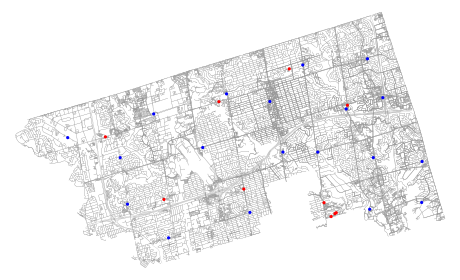

In [67]:
all_nodes = list(nodes.to_dict()['osmid'].keys())
nc, ns = node_color_and_size(amenities, all_nodes)

fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.2, bgcolor = 'white')

Stategy going forward: 
1. Heat map of traafic data 
2. Implement the algorithm - currently we are utilizing the algorithm from prof

# The Algorithm

## -------- DFS -----------

In [71]:

# first define the origin/source nodes as Node
origin = Node(graph = G, osmid = amenities[0].nearestNode)
destination = Node(graph = G, osmid = amenities[3].nearestNode)

In [72]:
%%time 
bar = tqdm(total=len(G))

route = []
frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    bar.update(1); time.sleep(0.05)
    node = frontier.pop()
    explored.add(node)
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route  = child.path()
                found = True
                continue
            frontier.append(child)

bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n", cost(G, route))

 25%|██▌       | 8815/35101 [07:33<22:33, 19.42it/s]

The route is 

 [6624988064, 7368052431, 7127096569, 7127096567, 261631317, 261631491, 7824126406, 1814304153, 1814304152, 261631540, 1333963652, 4315968214, 4315968216, 7127096563, 7127096564, 7127096546, 5777975648, 5777975647, 7127096541, 7368092038, 5670217272, 3447489202, 7368092015, 7368092012, 7368092002, 6474228780, 6474235297, 6474235311, 6842674658, 48490673, 1721319579, 6474235326, 7368091985, 7368091987, 7368091989, 48489536, 7244814028, 7244814019, 7244814018, 48487794, 48494741, 48495722, 48495726, 48496115, 253013816, 430878370, 430878300, 4948911358, 414424283, 430877776, 1245025174, 430878081, 430878425, 430877819, 430877721, 7250327562, 7250327570, 430878136, 809117253, 809232794, 809136544, 809136549, 809130585, 809130579, 5978796615, 5978796611, 809126912, 809117284, 430878477, 809126917, 6225873776, 253012447, 430878326, 430878484, 430878131, 430877969, 430877908, 253013434, 48496770, 4589183201, 4589183203, 4589183202, 4589183206, 5908603285, 4590854797, 48498576,

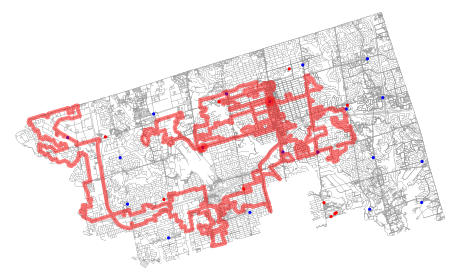

In [73]:
fig, ax = ox.plot_graph_route(G, route=route, node_color=nc, node_size=ns, edge_linewidth=0.2, bgcolor = 'white')

## -------- A* -----------

  0%|          | 3/35101 [00:00<20:19, 28.78it/s]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


  1%|          | 416/35101 [00:21<29:23, 19.67it/s]


The route is 

 [6624988064, 7368052431, 7368052433, 7368052434, 4550421840, 37016874, 4508806097, 130033865, 59943869, 130033004, 130033753, 130033552, 130033752, 130033751, 130033742, 130033745, 130033439, 84995922, 84997188, 6832060037, 130034184, 1272601850, 6832060049, 130034131, 529593356, 560654489, 560654512, 560654518, 7951336331, 7951336326, 7951336325, 7951336300, 7951336293, 248493828, 248493826, 248493825, 248493820, 1416788711, 248493821, 1416788713, 252363483, 1453370230, 1453370243, 1453370244, 1453370247, 1453370249, 1453370257, 5667681790, 6893295597, 6893280964, 6893295596, 6893280956, 5667039425, 6893280954, 5667039421, 5667039422, 6146537991, 6146537990, 6146537988, 6146538024, 6146537993, 6146531584, 6146538049, 6146538048] 

its cost is

 6629.397000000002


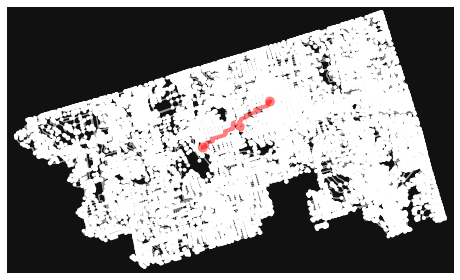

In [74]:
# toGoal, toDestination = astar_heuristic(G, origin.osmid, destination.osmid)
toGoal, toDestination = astar_heuristic(G, origin.osmid, destination.osmid)

%time
route = []
frontier = list()

bar = tqdm(total=len(G)) # for the progress bar

frontier.append(origin)
explored = set()
found = False

while frontier and not found:
    bar.update(1); time.sleep(0.05)
    
    # choose a node based on its heuristic value
    node = min(frontier, key = lambda node : toGoal[node.osmid] + toDestination[node.osmid])
    frontier.remove(node)
    explored.add(node)
    
    # expand its children
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route = child.path()
                found = True
                continue
            frontier.append(child)

bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n", cost(G, route))

fig, ax = ox.plot_graph_route(G, route)

--------------------------------------------------------------------------

# **TESTING ONWARDS** - Ignore

In [ ]:
place = 'University of Toronto'
G = ox.graph_from_place(place)
nodes, edges = ox.graph_to_gdfs(G)

keys = list(nodes.to_dict()['osmid'].keys())
print (keys)


[20979742, 21631731, 24959527, 24959528, 24959535, 24959545, 24959546, 24959547, 24959549, 24959550, 24959551, 24959555, 24959556, 24959559, 24959560, 24960058, 24960060, 24960063, 24960068, 24960070, 24960073, 24960076, 24960080, 50885141, 50885147, 50885160, 50897854, 50897859, 50897869, 50897874, 55808451, 55808512, 55808518, 55808527, 55808564, 55808571, 55808582, 55808839, 59817393, 59817394, 60052037, 60052038, 60052040, 60052042, 60052047, 60052048, 60052049, 60052050, 60654119, 60654120, 60654129, 60654133, 80927418, 80927426, 87475456, 87475463, 123347786, 123347984, 127275360, 127283024, 127284677, 127284680, 127289393, 130170945, 215726254, 239055725, 239055729, 242413453, 243633234, 244213560, 244213561, 249991437, 253815363, 253815365, 253815479, 262732431, 262732432, 262732448, 262817257, 262817259, 299625331, 303255446, 304885460, 304888562, 304890340, 304890341, 304892018, 305862114, 306721038, 306721042, 306721055, 306721057, 306725181, 306725184, 306729816, 306729822,

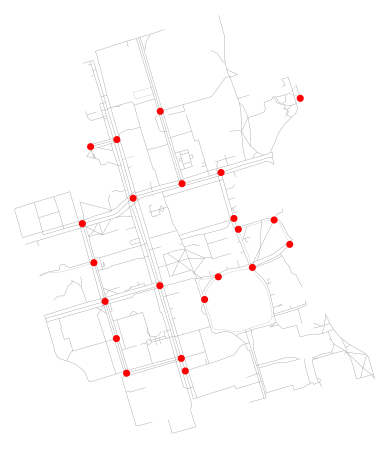

In [ ]:
def find_element_in_list(element, list_element):
    try:
        index_element = list_element.index(element)
        return index_element
    except ValueError:
        return -1

highlight_nodes = [20979742, 21631731, 24959527, 24959528, 24959535, 24959545, 24959546, 24959547, 24959549, 24959550, 24959551, 24959555, 24959556, 24959559, 24959560, 24960058, 24960060, 24960063, 24960068, 24960070, 24960073, 24960076]
colors = ['w'] * len(keys)
size = [0] * len(keys)
for i in range(len(highlight_nodes)): 
  idx = find_element_in_list(highlight_nodes[i], keys)
  if (idx != -1):
    colors[idx] = 'r'
    size[idx] = 50

fig, ax = ox.plot_graph(G, node_color=colors, node_size=size, edge_linewidth=0.2, bgcolor = 'white')

In [ ]:
api = osm.OsmApi() # this instantiate the OsmApi class,
# it has many function, we will use NodeGet function.
# For more detail about it check the doc
# http://osmapi.metaodi.ch/#osmapi.OsmApi.OsmApi.NodeGet

# for id in size(dic['osmid']):
#   id_info = api.NodeGet(dic['osmid'][3])

node = api.NodeGet(dic['nodes'][3])
lat = node['lat']
lon = node['lon']
# print(node)
pt_nearest_node_euc = ox.get_nearest_node(G, (lat, lon), method='euclidean')
print(node)
print(pt_nearest_node_euc)
G.nodes[pt_nearest_node_euc]

NameError: ignored

In [ ]:
!pip3 install geopy
